In [2]:
import sys
print(sys.executable)

/Users/suhasmahesh/opt/anaconda3/envs/lgpholed/bin/python


In [4]:
#from generate_carbene_ligand_table import n_arylation
from generate_carbene_ligand_table import smiles2mols
from rdkit.Chem import AllChem
from rdkit import Chem
import mols2grid
import pandas as pd

  0%|                                                                                                 | 10/11113 [00:00<04:32, 40.78it/s]


In [5]:
print('a')

a


In [15]:
halides_file_name = 'aromatic_halides_with_id.csv'
imidazoles_file_name = 'imidazoles_with_id.csv'

halide_df = pd.read_csv('input_data/' + halides_file_name)
imidazoles_df = pd.read_csv('input_data/' + imidazoles_file_name)

mols2grid.display(smiles2mols(halide_df['halide_SMILES'].tolist() ),subImgSize=(150,150),n_rows=5)


MolGridWidget()

In [16]:
mols2grid.display(smiles2mols(imidazoles_df['imidazole_SMILES'].tolist() ),subImgSize=(150,150),n_rows=5)

MolGridWidget()

In [17]:
print(n_arylation('C1=CN=CN1','C1(=C(N=C(N=C1Cl)Cl)Cl)Cl'))

mol1 =  Chem.MolFromSmiles('CCCC')
mol2 =  Chem.MolFromSmiles('CCN')



{'*c1nccn1c1c(Cl)c(Cl)nc(Cl)n1->*', '*c1nccn1c1nc(Cl)c(Cl)c(Cl)n1->*'}


In [287]:
for halide in halide_df['halide_SMILES'][:5]:
    for imidazole in imidazoles_df['imidazole_SMILES'][:100]:
        #print (imidazole, halide)
        print ( list(n_arylation(imidazole, halide)))

['*c1c2c(cc(S(N)(=O)=O)c1-n1c3[nH]c(=O)n(C)c(=O)c3n(C)c1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(c(=O)[nH]c(=O)n3C)n(C)c1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(c(=O)n(C)c(=O)n3C)n(C)c1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(N)ncnc3n(C3OC(C(=O)NCC)C(O)C3O)c1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(ncn3C3OC(C(=O)NCC)C(O)C3O)c(N)nc1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c(N)c3ncn(C4OC(C(=O)NCC)C(O)C4O)c3nc1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(ncn3C3OC(CO)C(O)C3O)c(N)nc1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(N)ncnc3n(C3OC(CO)C(O)C3O)c1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c(N)c3ncn(C4OC(CO)C(O)C4O)c3nc1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1c(NC3CCCC3)c3ncn(C4OC(CO)C(O)C4O)c3nc1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(ncn3C3OC(CO)C(O)C3O)c(NC3CCCC3)nc1->*)S(=O)(=O)NCN2', '*c1c2c(cc(S(N)(=O)=O)c1-n1c3c(NC4CCCC4)ncnc3n(C3OC(CO)C(O)C3O)c1->*)S(=O)(=O)NCN2']
['*c1c2c(cc(S(N)(=O)=O)c1-n1

In [290]:
def n_arylation(imidazole_smiles, halide_smiles):
    # Create RDKit molecule objects
    imidazole = Chem.MolFromSmiles(imidazole_smiles)
    halide = Chem.MolFromSmiles(halide_smiles)

    # Define Suzuki coupling reaction using reaction SMARTS
    n_arylation_rxn_smarts = '[cH:1][c:2](-[I,Br,Cl,F:3])[c:4].[nX2:5][cH1:6][n:7]>>*-[cH:1][cH0:2](-[n:5][c:6](->*)[n:7])[c:4].[I,Br,Cl,F:3]'
    n_arylation_rxn = AllChem.ReactionFromSmarts(n_arylation_rxn_smarts)

    # Perform the reaction
    product_set = n_arylation_rxn.RunReactants((halide, imidazole))

    # Collect the products and convert them to SMILES
    products = []
    for product in product_set:
        products.append(Chem.MolToSmiles(product[0], isomericSmiles=False))

    return set(products)

print (smiles_list)
smiles_list = list(n_arylation('Cn1c(=O)c2c(ncn2CC(=O)O)n(C)c1=O','C1=C(C=C(C(=C1[N+](=O)[O-])N)Br)[N+](=O)[O-]'))
Chem.MolFromSmiles(smiles_list[0])

['*c1c([N+](=O)[O-])cc([N+](=O)[O-])c(N)c1-n1c2c(c(=O)n(C)c(=O)n2C)n(CC(=O)O)c1->*']


[15:48:38] Can't kekulize mol.  Unkekulized atoms: 15 16 30


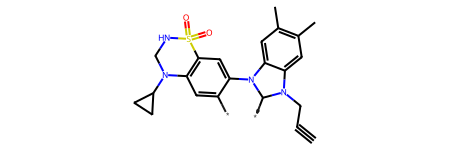

In [7]:
Chem.MolFromSmiles('*c1cc2c(cc1-n1c3cc(C)c(C)cc3n(CC#C)C1->*)S(=O)(=O)NCN2C1CC1', sanitize=False)

In [217]:
def get_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None: Chem.Kekulize(mol, clearAromaticFlags=True)
    return mol

In [220]:
mols2grid.display ([Chem.MolFromSmiles(smiles, False) for smiles in smiles_list], subImgSize=(150,150), n_rows=5)

MolGridWidget()

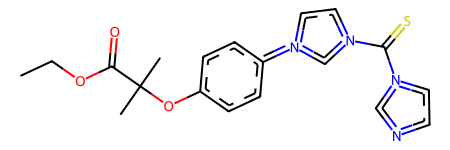